### Setup the Notebook Environment and Import Flopy
Load a few standard libraries, and then load flopy.

In [1]:
%matplotlib inline
from __future__ import print_function
import sys
import os
import platform
import shutil
import numpy as np
import pandas as pd
# Import flopy
import flopy
from flopy.utils.reference import SpatialReference
from flopy.export.shapefile_utils import recarray2shp, shp2recarray
from flopy.utils.geometry import Polygon, LineString, Point
import matplotlib.pyplot as plt
import cartopy.crs as ccrs



In [2]:
flopy.utils.reference.epsgRef

<class flopy.utils.reference.epsgRef at 0x1190932c0>

In [3]:
# Set up the paths
basepath = os.path.abspath(os.path.join('data'))
if platform.system() == 'Windows':
    binpath = os.path.join(basepath, 'bin')
else:
    binpath = os.path.join(basepath, 'bin', 'mac')

### Setup a New Directory and Change Paths
For this tutorial, we will work in the model directory.  We can use some fancy Python tools to help us manage the directory creation.  Note that if you encounter path problems with this workbook, you can stop and then restart the kernel and the paths will be reset.

In [4]:
# Set the name of the path to the model working directory
dirname = 'model'
modelpath = os.path.join(r'/Users/andrewrich_old/Documents/scwa/sv_model','lith_V9')
modelname = 'sv_model_grid_6layers'
print('Name of model path: ', modelpath)

# Now let's check if this directory exists.  If not, then we will create it.
if os.path.exists(modelpath):
    print('Model working directory already exists.')
else:
    print('Creating model working directory.')
    os.mkdir(modelpath)

Name of model path:  /Users/andrewrich_old/Documents/scwa/sv_model/lith_V9
Model working directory already exists.


### Define the Model Extent, Grid Resolution, and Characteristics
It is normally good practice to group things that you might want to change into a single code block.  This makes it easier to make changes and rerun the code.

In [5]:
fb = flopy.modflow.Modflow.load(os.path.join(
    modelname+'.nam')
                                , version='mf2005', model_ws=modelpath, verbose=True)


lowerleft = [ 6436682.01941381,  1791562.92451396]

fb.sr = SpatialReference(delr=fb.dis.delr, delc=fb.dis.delc, xll=lowerleft[0], yll=lowerleft[1], units='feet',
                        proj4_str='EPSG:2871', rotation=23)


fb.sr


Creating new model with name: sv_model_grid_6layers
--------------------------------------------------

Parsing the namefile --> /Users/andrewrich_old/Documents/scwa/sv_model/lith_V9/sv_model_grid_6layers.nam
Setting filehandles:

--------------------------------------------------
External unit dictionary:
{1: filename:/Users/andrewrich_old/Documents/scwa/sv_model/lith_V9/sv_init_heads.bas, filetype:BAS6, 2: filename:/Users/andrewrich_old/Documents/scwa/sv_model/lith_V9/SV_HOBS_11_18_2015.HOB, filetype:HOB, 3: filename:/Users/andrewrich_old/Documents/scwa/sv_model/lith_V9/SV_HOBS_coords_new.HYD, filetype:HYD, 7: filename:/Users/andrewrich_old/Documents/scwa/sv_model/lith_V9/./output/sv_model_grid_6layers.lst, filetype:LIST, 11: filename:/Users/andrewrich_old/Documents/scwa/sv_model/lith_V9/sv_pp_plus_zones.upw, filetype:UPW, 12: filename:/Users/andrewrich_old/Documents/scwa/sv_model/lith_V9/mtn_4wide_demand_processed_rur_dph_upd2_wel.wel, filetype:WEL, 13: filename:/Users/andrewrich_o

/Users/andrewrich_old/anaconda/envs/pyrich/lib/python2.7/site-packages/flopy/modflow/mfmnw2.py:1380: UserWarning: MNW2: {}
Extra items in Dataset 2a!Check for WELLIDs with space but not enclosed in quotes.
  line))


removing existing data for kper=0
adding Package:  MNW2
   MNW2 package load...success
loading ghb package file...
   Parameters detected. Number of parameters =  1
   loading parameter "ghbk"...
   loading <class 'flopy.modflow.mfghb.ModflowGhb'> for kper     1
   loading <class 'flopy.modflow.mfghb.ModflowGhb'> for kper     2
   loading <class 'flopy.modflow.mfghb.ModflowGhb'> for kper     3
   loading <class 'flopy.modflow.mfghb.ModflowGhb'> for kper     4
   loading <class 'flopy.modflow.mfghb.ModflowGhb'> for kper     5
   loading <class 'flopy.modflow.mfghb.ModflowGhb'> for kper     6
   loading <class 'flopy.modflow.mfghb.ModflowGhb'> for kper     7
   loading <class 'flopy.modflow.mfghb.ModflowGhb'> for kper     8
   loading <class 'flopy.modflow.mfghb.ModflowGhb'> for kper     9
   loading <class 'flopy.modflow.mfghb.ModflowGhb'> for kper    10
   loading <class 'flopy.modflow.mfghb.ModflowGhb'> for kper    11
   loading <class 'flopy.modflow.mfghb.ModflowGhb'> for kper    12


/Users/andrewrich_old/anaconda/envs/pyrich/lib/python2.7/site-packages/flopy/utils/reference.py:404: UserWarning: rotation arg has recently changed. It was previously treated as positive clockwise. It now is positive counterclockwise.
  warnings.warn(msg)
/Users/andrewrich_old/anaconda/envs/pyrich/lib/python2.7/site-packages/flopy/utils/reference.py:278: UserWarning: rotation arg has recently changed. It was previously treated as positive clockwise. It now is positive counterclockwise.
  warnings.warn(msg)


xul:6382956.489; yul:1918132.342; rotation:23; proj4_str:+init=EPSG:2871; units:feet; lenuni:1; length_multiplier:1.0

## Flopy Tutorial 1: Running the Model

Flopy has several methods attached to the model object that can be used to run the model.  They are run_model, run_model2, and run_model3.  Here we use run_model3, which will write output to the notebook.

In [6]:
# Imports for plotting and reading the MODFLOW binary output file

import flopy.utils.binaryfile as bf

# Create the headfile object and grab the results for last time.
headfile = os.path.join(modelpath,'output', modelname + '.hds')

headfileobj = bf.HeadFile(headfile)

# Get a list of times that are contained in the model
times = headfileobj.get_times()
print('Headfile (' + modelname + '.hds' + ') contains the following list of times: ', times[0:10])

Headfile (sv_model_grid_6layers.hds) contains the following list of times:  [31.000002, 62.0, 90.0, 121.0, 151.0, 182.0, 212.0, 243.0, 274.0, 304.0]


In [7]:
#Get a numpy array of heads for totim = 1.0
#The get_data method will extract head data from the binary file.
head = headfileobj.get_data(totim=times[0])

#Print statistics on the head
print('Head statistics')
print('  min: ', head.min())
print('  max: ', head.max())
print('  std: ', head.std())

Head statistics
  min:  -999.0
  max:  888.804
  std:  538.938


### Use the Flopy ModelMap Capabilities to Make Plots
Mapping capabilities are available in flopy as part of [flopy.plot.ModelMap](http://modflowpy.github.io/flopydoc/map.html) to help with plotting.  Here are a couple of examples.

In [8]:
fb.dis.sr

xul:6382956.489; yul:1918132.342; rotation:23; proj4_str:+init=EPSG:2871; units:feet; lenuni:1; length_multiplier:1.0

In [9]:

from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.img_tiles as cimgt

def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(9, 13),
                           subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=False)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax


/Users/andrewrich_old/anaconda/envs/pyrich/lib/python2.7/site-packages/matplotlib/ticker.py:1693: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


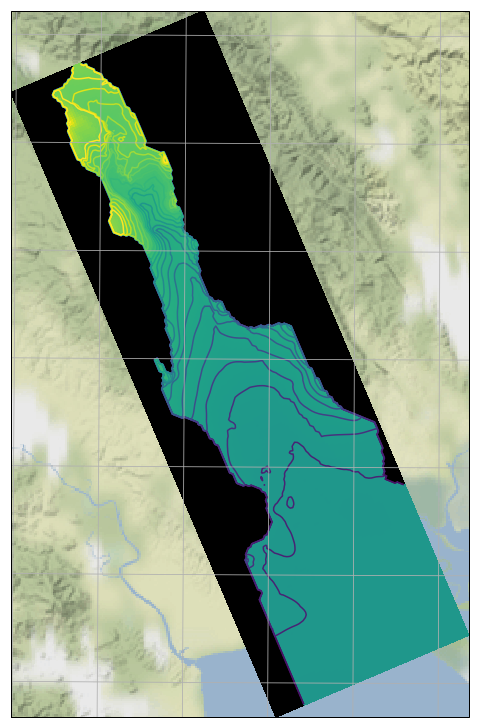

In [19]:
extent = [-122.75,-122.35,38.0,38.4]

# request = cimgt.GoogleTiles()
request = cimgt.StamenTerrain()
# request = cimgt.Image()
# request = cimgt.OSM()
fig, ax = make_map(projection=ccrs.epsg(2871))
ax.set_extent(extent)

ax.add_image(request, 10)
modelmap = flopy.plot.ModelMap(model=fb,ax= ax)
modelmap.plot_array(head,ax=ax,transform=ccrs.epsg(2871))
modelmap.contour_array(head, levels=np.arange(-50, 500, 25),ax=ax)
# modelmap.plot_ibound(ax = ax)
modelmap.plot_inactive()
